 ## Author : **SHREYA SETIA**

## THE SPARKS FOUNDATION 

## **DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP July'21**

## TASK 1 : Prediction using Supervised Machine Learning
Create a machine learning model that predicts the percentage marks that a student is expected to score based upon the number of hours they studied.
 
The data contains the following columns:

* **Hours**: Number of hours studied by a student
* **Scores**: Percentage marks obtained by a student

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Reading the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(12)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Analyzing the Data

DATA CORRELATION: 
            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


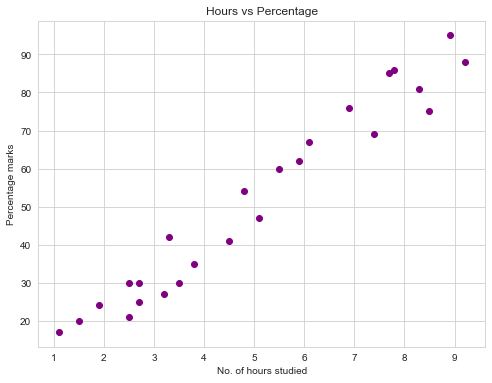

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(x='Hours',y='Scores',data=data,c='purple')
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage marks')
plt.title('Hours vs Percentage')

print('DATA CORRELATION: \n', data.corr())

From the above graph, we can see that there exists a linear positive relation between no. of hours studied and pecentage marks scored by a student

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on (in this case the Hours column), and a y array with the target variable, in this case the Scores column.
### X and y arrays

In [5]:
X = data.drop('Scores',axis=1)
y = data.drop('Hours',axis=1)

### Train Test Split
Now let's split the data into a training set and a testing set. We will train our model on the training set and then evaluate the model using the test set.

In [6]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test.values

array([[2.5],
       [1.5],
       [6.1],
       [8.5],
       [7.8],
       [6.9],
       [2.7],
       [5.5]])

 ### Creating and Training the Model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression()

### Understanding the Model
Let's understand the model by checking out it's coefficients and how we can interpret them.

In [11]:
print(model.intercept_)

[0.45439624]


In [12]:
coef_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
Hours,10.077092


Interpretting the coefficient:

* 1 hour increase in the study time is associated with an increase of 9.9 percentage marks.

### Predictions from our Model
Let's grab predictions off our test set and see how well our model performed!

In [44]:
predictions = model.predict(X_test)
pred = pd.DataFrame(predictions)
predictions

array([[25.64712548],
       [15.57003378],
       [61.92465558],
       [86.10967564],
       [79.05571146],
       [69.98632893],
       [27.66254381],
       [55.87840056]])

In [46]:
compare = pd.DataFrame({'Hours': X_test.values.flatten(),'Actual Scores': y_test.values.flatten(),'Predicted Scores': predictions.flatten()})
compare

,Hours,Actual Scores,Predicted Scores
0,2.5,21,25.647125
1,1.5,20,15.570034
2,6.1,67,61.924656
3,8.5,75,86.109676
4,7.8,86,79.055711
5,6.9,76,69.986329
6,2.7,25,27.662544
7,5.5,60,55.878401


### Visualizing the Model

Text(0.5, 1.0, 'Actual vs Predicted')

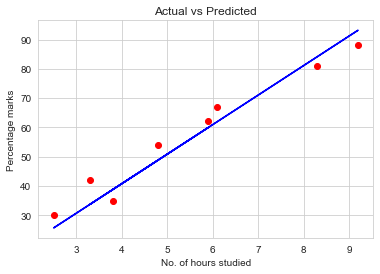

In [15]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test, predictions, c='blue')
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage marks')
plt.title('Actual vs Predicted')

### Evaluating the model

In [16]:
from sklearn.metrics import mean_absolute_error

In [51]:
print('Mean absolute Error : ', mean_absolute_error(y_test,predictions))

Mean absolute Error :  5.625526828545115


In [50]:
model.score(X_test,y_test)

0.9429585849016988

### What is the predicted score if a student studies for 9.25 hours per day?

In [20]:
hours = 9.25
pred= model.predict([[hours]])
print('No. of hours:', hours)
print('Predicted Score:{}'.format(pred))

No. of hours: 9.25
Predicted Score:[[93.66749441]]
